In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing import image

In [110]:
df = pd.read_csv('C:/Users/ASUS/Desktop/p/ML/ML/NN/Dataset/pokemon/train.csv')

In [111]:
X = df.values
print(X.shape)
X_values = []
Y_values = []

(304, 2)


In [112]:
pokemon={
    'Pikachu':0,
    'Bulbasaur':1,
    'Charmander':2
}

In [113]:
m = X.shape[0]
for i in range(m):
    title = X[i][0]
    
    try:
        img = image.load_img("Dataset/pokemon/Images/"+title,target_size=(300,300,3))
        img = image.img_to_array(img)/255
        X_values.append(img)
        Y_values.append(pokemon[X[i][1]])
    except:
        continue
        
    

(135, 300, 300, 3)
(135, 3)


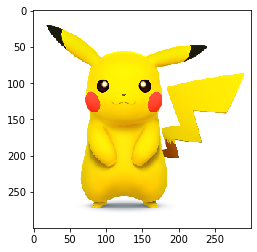

In [114]:
X_values = np.array(X_values)
Y_values = np.array(Y_values)

from keras.utils.np_utils import to_categorical
Y_values = to_categorical(Y_values,num_classes=3)

print(X_values.shape)
print(Y_values.shape)
plt.imshow(X_values[0])

In [115]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(300,300,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu')) # 5x5
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 156800)            0         
__________

In [117]:
hist = model.fit(X_values,Y_values,epochs=8,shuffle=True,batch_size=4,validation_split=0.1)

Train on 121 samples, validate on 14 samples
Epoch 1/8
121/121 [==============================] - 49s 407ms/step - loss: 1.0734 - acc: 0.5372 - val_loss: 1.5323 - val_acc: 0.0000e+00
Epoch 2/8
121/121 [==============================] - 22s 185ms/step - loss: 0.5309 - acc: 0.8264 - val_loss: 3.8957 - val_acc: 0.0000e+00
Epoch 3/8
121/121 [==============================] - 52s 433ms/step - loss: 0.6468 - acc: 0.7851 - val_loss: 1.1660 - val_acc: 0.5000
Epoch 4/8
121/121 [==============================] - 25s 205ms/step - loss: 0.2555 - acc: 0.9091 - val_loss: 0.2490 - val_acc: 0.9286
Epoch 5/8
121/121 [==============================] - 42s 344ms/step - loss: 0.2224 - acc: 0.9256 - val_loss: 0.2525 - val_acc: 0.9286
Epoch 6/8
121/121 [==============================] - 34s 279ms/step - loss: 0.4788 - acc: 0.8678 - val_loss: 0.9924 - val_acc: 0.4286
Epoch 7/8
121/121 [==============================] - 20s 164ms/step - loss: 0.4031 - acc: 0.8926 - val_loss: 0.9534 - val_acc: 0.6429
Epoch 8/8

In [118]:
outputs = model.predict(X_values)

In [119]:
df_test = pd.read_csv('Dataset/pokemon/test.csv')

In [120]:
test = df_test.values
print(test[1][0])

2236.jpg


In [121]:
n = test.shape[0]
X_test = []
title_out = []

for i in range(n):
    title = test[i][0]
    
    try:
        img = image.load_img("Dataset/pokemon/Images/"+title,target_size=(300,300,3))
        img = image.img_to_array(img)/255
        X_test.append(img)
        
    except:
        continue

In [122]:
X_test = np.asarray(X_test)
X_test.shape

(123, 300, 300, 3)

In [123]:
outputs = model.predict(X_test)


In [124]:
# print(outputs)

In [125]:
# np.argmax?
new_out = np.argmax(outputs,axis=1)

In [126]:
pokemonblb={
    '0':"Pikachu",
    '1':"Bulbasaur",
    '2':"Charmander"
}

In [127]:
m = outputs.shape[0]
new_output = []
for ix in range(m):
    new_output.append(pokemonblb[str(new_out[ix])])

In [128]:
print(new_output)

['Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Pikachu', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Charmander', 'Charmander', 'Pikachu', 'Bulbasaur', 'Pikachu',

In [129]:
y =  pd.DataFrame(data=new_output,columns=["NameOfPokemon"]) 
y.to_csv("pokemonOutput3.csv",index = True)

In [ ]:
from sklearn.metrics import confusion_matrix
from Visualize import plot_confusion_matrix

In [54]:
print(outputs.shape,Y_values.shape)

(123,) (136,)


In [52]:
cnf_matrix = confusion_matrix(outputs,Y_values)
print(cnf_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [123, 136]